In [3]:
import numpy as np 
import pandas as pd

In [6]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

# 1. Data Cleaning 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# rename the columns

df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
883,ham,Dude we should go sup again
2155,ham,What year. And how many miles.
3083,ham,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...
1721,ham,Am watching house ÛÒ very entertaining ÛÒ am...
1010,ham,Lol I would but my mom would have a fit and te...


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
## Handling missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
## duplicate values
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

# 2. EDA 

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

In [25]:
import matplotlib.pylab as plt

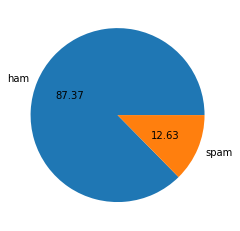

In [26]:
plt.pie(df.target.value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [27]:
## imbalanced data

import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [31]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [34]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

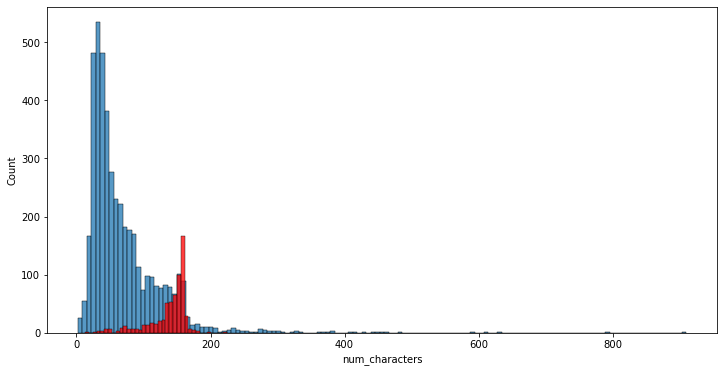

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

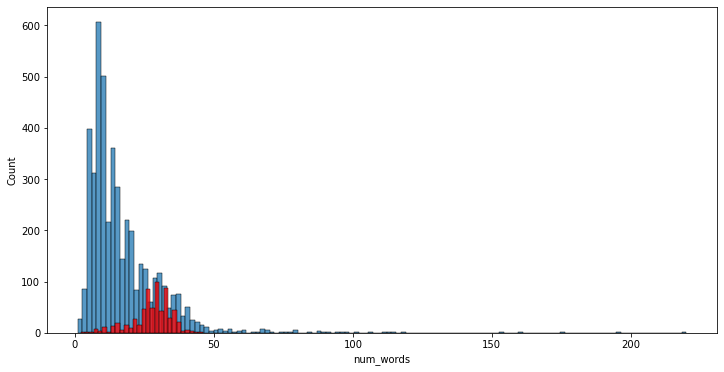

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

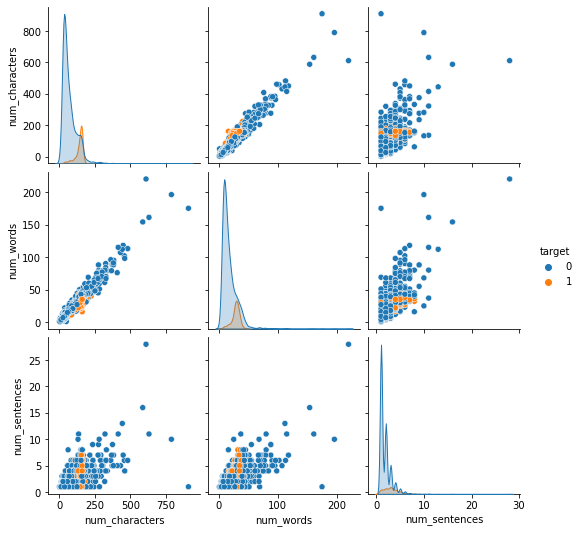

In [37]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

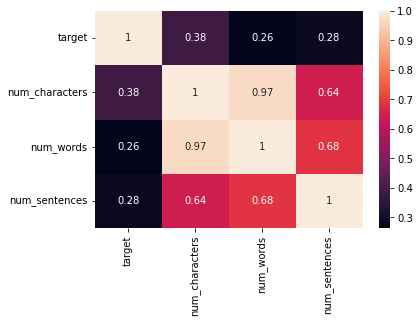

In [38]:
sns.heatmap(df.corr(),annot=True)

#  3. Data Preprocessing


* Lower case
* Tokenization
* Removing special characters
* Removing stop words and puctuation
* stemming

In [60]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [62]:
df['text'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [63]:
transform_text("FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv")

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [64]:
df['transformed_text'] = df['text'].apply(transform_text)

In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [70]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [71]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

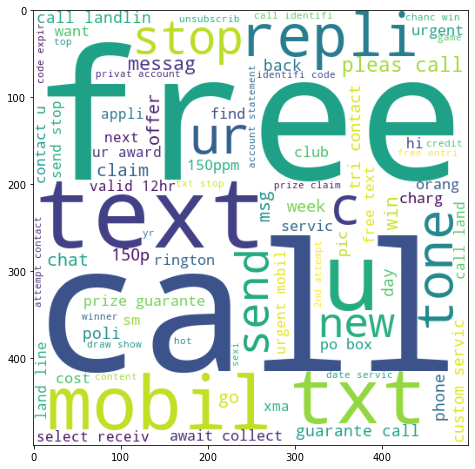

In [72]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [73]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

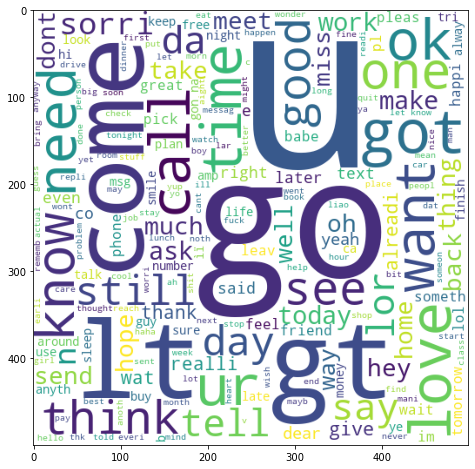

In [74]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [75]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [76]:
len(spam_corpus)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


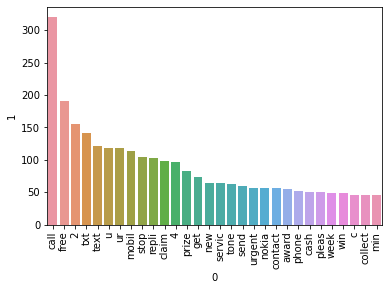

In [77]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [78]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [79]:
len(ham_corpus)

35394

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


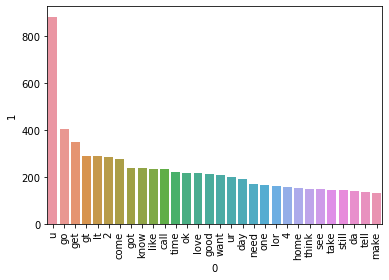

In [80]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [166]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [169]:
X.shape

(5169, 6708)

In [170]:
y = df['target'].values

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [173]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [174]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [175]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8646034816247582
[[787 121]
 [ 19 107]]
0.4692982456140351


In [176]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9506769825918762
[[908   0]
 [ 51  75]]
1.0


In [177]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9613152804642167
[[902   6]
 [ 34  92]]
0.9387755102040817


In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [179]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [180]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [181]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [182]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.98989898989899)

In [183]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.98989898989899
For  KN
Accuracy -  0.9032882011605415
Precision -  1.0
For  NB
Accuracy -  0.9506769825918762
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8352941176470589
For  LR
Accuracy -  0.9458413926499033
Precision -  0.9166666666666666
For  RF
Accuracy -  0.9680851063829787
Precision -  1.0
For  AdaBoost
Accuracy -  0.9593810444874274
Precision -  0.9117647058823529
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8771929824561403
For  ETC
Accuracy -  0.971953578336557
Precision -  1.0
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9382716049382716
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9320388349514563


In [184]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [185]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903288,1.000000
2,NB,0.950677,1.000000
5,RF,0.968085,1.000000
8,ETC,0.971954,1.000000
0,SVC,0.971954,0.989899
9,GBDT,0.946809,0.938272
10,xgb,0.964217,0.932039
4,LR,0.945841,0.916667
6,AdaBoost,0.959381,0.911765
7,BgC,0.961315,0.877193


In [186]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [187]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903288
1,NB,Accuracy,0.950677
2,RF,Accuracy,0.968085
3,ETC,Accuracy,0.971954
4,SVC,Accuracy,0.971954
5,GBDT,Accuracy,0.946809
6,xgb,Accuracy,0.964217
7,LR,Accuracy,0.945841
8,AdaBoost,Accuracy,0.959381
9,BgC,Accuracy,0.961315


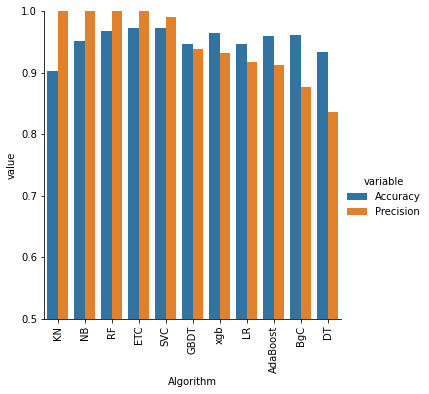

In [188]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

model improve
* Change the max_features parameter of TfIdf

In [232]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9709864603481625
Precision -  0.9897959183673469
For  KN
Accuracy -  0.9148936170212766
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8426966292134831
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9759036144578314
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9497098646034816
Precision -  0.8854166666666666
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.864406779661017
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9902912621359223
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9629629629629629
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.941747572815534


In [214]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [215]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [216]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.903288,1.000000,0.914894,1.000000
1,NB,0.950677,1.000000,0.964217,1.000000
2,RF,0.968085,1.000000,0.971954,1.000000
3,ETC,0.971954,1.000000,0.975822,0.990291
4,SVC,0.971954,0.989899,0.970986,0.989796
5,GBDT,0.946809,0.938272,0.950677,0.962963
6,xgb,0.964217,0.932039,0.966151,0.941748
7,LR,0.945841,0.916667,0.954545,0.975904
8,AdaBoost,0.959381,0.911765,0.949710,0.885417
9,BgC,0.961315,0.877193,0.961315,0.864407


* Scaling of data

In [217]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
# tfidf = TfidfVectorizer(max_features=3000)

# X = tfidf.fit_transform(df['transformed_text']).toarray()
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# y = df['target'].values

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9642166344294004
Precision -  0.9587628865979382
For  KN
Accuracy -  0.9148936170212766
Precision -  1.0
For  NB
Accuracy -  0.9806576402321083
Precision -  0.9818181818181818
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8409090909090909
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9655172413793104
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9497098646034816
Precision -  0.8854166666666666
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.864406779661017
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9902912621359223
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9629629629629629
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.941747572815534


In [218]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [219]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [220]:
# new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.903288,1.000000,0.914894,1.000000,0.914894,1.000000
1,NB,0.950677,1.000000,0.964217,1.000000,0.980658,0.981818
2,RF,0.968085,1.000000,0.971954,1.000000,0.971954,1.000000
3,ETC,0.971954,1.000000,0.975822,0.990291,0.975822,0.990291
4,SVC,0.971954,0.989899,0.970986,0.989796,0.964217,0.958763
5,GBDT,0.946809,0.938272,0.950677,0.962963,0.950677,0.962963
6,xgb,0.964217,0.932039,0.966151,0.941748,0.966151,0.941748
7,LR,0.945841,0.916667,0.954545,0.975904,0.956480,0.965517
8,AdaBoost,0.959381,0.911765,0.949710,0.885417,0.949710,0.885417
9,BgC,0.961315,0.877193,0.961315,0.864407,0.961315,0.864407


* using other columns like num_characters

In [221]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
# tfidf = TfidfVectorizer(max_features=3000)

# X = tfidf.fit_transform(df['transformed_text']).toarray()
# # appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# y = df['target'].values

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9613152804642167
Precision -  0.9056603773584906
For  KN
Accuracy -  0.9119922630560928
Precision -  1.0
For  NB
Accuracy -  0.9806576402321083
Precision -  0.9818181818181818
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8131868131868132
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9354838709677419
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9805825242718447
For  AdaBoost
Accuracy -  0.9497098646034816
Precision -  0.8490566037735849
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8360655737704918
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9626168224299065
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.8938053097345132


In [222]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [223]:
# new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.903288,1.000000,0.914894,1.000000,0.914894,1.000000,0.911992,1.000000
1,NB,0.950677,1.000000,0.964217,1.000000,0.980658,0.981818,0.980658,0.981818
2,RF,0.968085,1.000000,0.971954,1.000000,0.971954,1.000000,0.973888,0.980583
3,ETC,0.971954,1.000000,0.975822,0.990291,0.975822,0.990291,0.973888,0.962617
4,SVC,0.971954,0.989899,0.970986,0.989796,0.964217,0.958763,0.961315,0.905660
5,GBDT,0.946809,0.938272,0.950677,0.962963,0.950677,0.962963,0.947776,0.900000
6,xgb,0.964217,0.932039,0.966151,0.941748,0.966151,0.941748,0.964217,0.893805
7,LR,0.945841,0.916667,0.954545,0.975904,0.956480,0.965517,0.956480,0.935484
8,AdaBoost,0.959381,0.911765,0.949710,0.885417,0.949710,0.885417,0.949710,0.849057
9,BgC,0.961315,0.877193,0.961315,0.864407,0.961315,0.864407,0.957447,0.836066


In [224]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [225]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [226]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [227]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9813084112149533


In [228]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [229]:
from sklearn.ensemble import StackingClassifier

In [230]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [231]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9482758620689655


In [233]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))